In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as dates
sns.set(rc={'figure.figsize':(11, 4)})

In [2]:
df = pd.read_csv('file:///C:/Users/user/Downloads/archive%20(8)/Airplane_Crashes_and_Fatalities_Since_1908.csv')
df.shape


(5268, 14)

In [3]:
df.describe()

,index,Aboard,Fatalities,Ground
count,5268.00000,5246.000000,5256.000000,5246.000000
mean,2633.50000,27.554518,20.068303,1.608845
std,1520.88494,43.076711,33.199952,53.987827
min,0.00000,0.000000,0.000000,0.000000
25%,1316.75000,5.000000,3.000000,0.000000
50%,2633.50000,13.000000,9.000000,0.000000
75%,3950.25000,30.000000,23.000000,0.000000
max,5267.00000,644.000000,583.000000,2750.000000


array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'Aboard'}>],
       [<AxesSubplot:title={'center':'Fatalities'}>,
        <AxesSubplot:title={'center':'Ground'}>]], dtype=object)

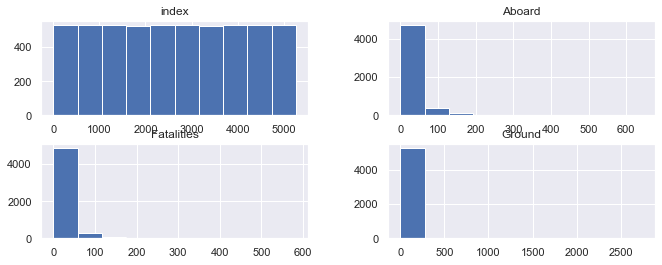

In [4]:
df.hist(bins=10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         5268 non-null   int64  
 1   Date          5268 non-null   object 
 2   Time          3049 non-null   object 
 3   Location      5248 non-null   object 
 4   Operator      5250 non-null   object 
 5   Flight #      1069 non-null   object 
 6   Route         3562 non-null   object 
 7   Type          5241 non-null   object 
 8   Registration  4933 non-null   object 
 9   cn/In         4040 non-null   object 
 10  Aboard        5246 non-null   float64
 11  Fatalities    5256 non-null   float64
 12  Ground        5246 non-null   float64
 13  Summary       4878 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 576.3+ KB


In [6]:
df.loc[df['Time'].str.startswith('c') == True].Time

190     c: 1:00
213     c:17:00
228     c: 2:00
279     c:09:00
1462     c16:50
2599    c:09:00
3390     c14:30
4838    c: 9:40
Name: Time, dtype: object

In [7]:
df.loc[df['Time'].str.startswith('c:') == True,'Time'] = df.loc[df['Time'].str.startswith('c:') == True,'Time'].str.split("c:").str[1]
df.loc[df['Time'].str.startswith('c') == True,'Time'] = df.loc[df['Time'].str.startswith('c') == True,'Time'].str.split("c:").str[1]
df.loc[df['Time'] == "12'20",'Time'] = "12:20"
df.loc[df['Time'] == "18.40",'Time'] = "18:40"
df.loc[df['Time'] == "114:20",'Time'] = "14:20"
df.loc[df['Time'] == "22'08",'Time'] = "22:08"

In [8]:
df['datetime'] = pd.to_datetime(df['Date']+" "+df['Time'])

In [9]:
# lets add weekday to plot it
df['weekday'] = df['datetime'].dt.day_name()
df['year'] = df['datetime'].dt.year

In [10]:
ImputedValuesdf = df.copy()
numericData = ImputedValuesdf.select_dtypes(include=np.number).columns.tolist()
missingCounts = df[numericData].isna().sum().sort_values(ascending=False)
missingCounts[missingCounts > 0]

year          2221
Aboard          22
Ground          22
Fatalities      12
dtype: int64

In [11]:
# To check null values
df.isnull().sum()

index              0
Date               0
Time            2221
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
datetime        2221
weekday         2221
year            2221
dtype: int64

In [12]:
# Count the missing values in Type column.
df.Type.isnull().sum()

27

In [13]:
# Shape of DataFrame
df.shape

(5268, 17)

In [14]:
# Calculate the percentage of missing values in Type column.
float(100.0*27/5268)

0.5125284738041003

### Drop the records with Dirigible missing

In [15]:
#drop the records with Dirigible missing in df and copy in df1 dataframe.
df1= df[-df.Type.isnull()].copy()
df1.shape

(5241, 17)

In [16]:
# Dimensions of DataFrame
df1.ndim

2

In [17]:
# To find Central location of data from df1
df1.mean()

C:\Users\user\AppData\Local\Temp\ipykernel_15200\3208839689.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df1.mean()
C:\Users\user\AppData\Local\Temp\ipykernel_15200\3208839689.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.mean()


index         2641.407747
Aboard          27.620954
Fatalities      20.100554
Ground           1.602567
year          1977.347341
dtype: float64

In [18]:
# To find median value of a data set
df1.median()

C:\Users\user\AppData\Local\Temp\ipykernel_15200\3370463481.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df1.median()
C:\Users\user\AppData\Local\Temp\ipykernel_15200\3370463481.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.median()


index         2644.0
Aboard          13.0
Fatalities       9.0
Ground           0.0
year          1978.0
dtype: float64

In [19]:
# To find values that appears most often
df1.mode()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,datetime,weekday,year
0,0,02/28/1973,15:00,"Sao Paulo, Brazil",Aeroflot,-,Training,Douglas DC-3,49,178,2.0,2.0,0.0,Crashed during takeoff.,1976-08-28 12:40:00,Thursday,1999.0
1,1,06/18/1972,NaN,NaN,Military - U.S. Air Force,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985-01-23 10:35:00,NaN,NaN
2,2,08/27/1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,3,08/28/1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4,4,08/31/1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236,5263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
5237,5264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
5238,5265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
5239,5266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [20]:
# Standard deviation
df1.std()

C:\Users\user\AppData\Local\Temp\ipykernel_15200\1813207459.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.std()


index                          1517.596554
Aboard                           43.155006
Fatalities                       33.257536
Ground                           54.112538
datetime      7502 days 12:40:39.783413120
year                             20.548877
dtype: object

In [21]:
# Variance
df1.var()

C:\Users\user\AppData\Local\Temp\ipykernel_15200\2871271835.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.var()


index         2.303099e+06
Aboard        1.862355e+03
Fatalities    1.106064e+03
Ground        2.928167e+03
year          4.222563e+02
dtype: float64

In [22]:
# Correlation
corr = df1.corr()
corr

,index,Aboard,Fatalities,Ground,year
index,1.000000,0.145530,0.096812,0.031416,0.994817
Aboard,0.145530,1.000000,0.756939,0.023367,0.062341
Fatalities,0.096812,0.756939,1.000000,0.035311,0.021199
Ground,0.031416,0.023367,0.035311,1.000000,0.031159
year,0.994817,0.062341,0.021199,0.031159,1.000000


### To calculate the correlation between the numeric variables we can use heatmap to find correlation among them

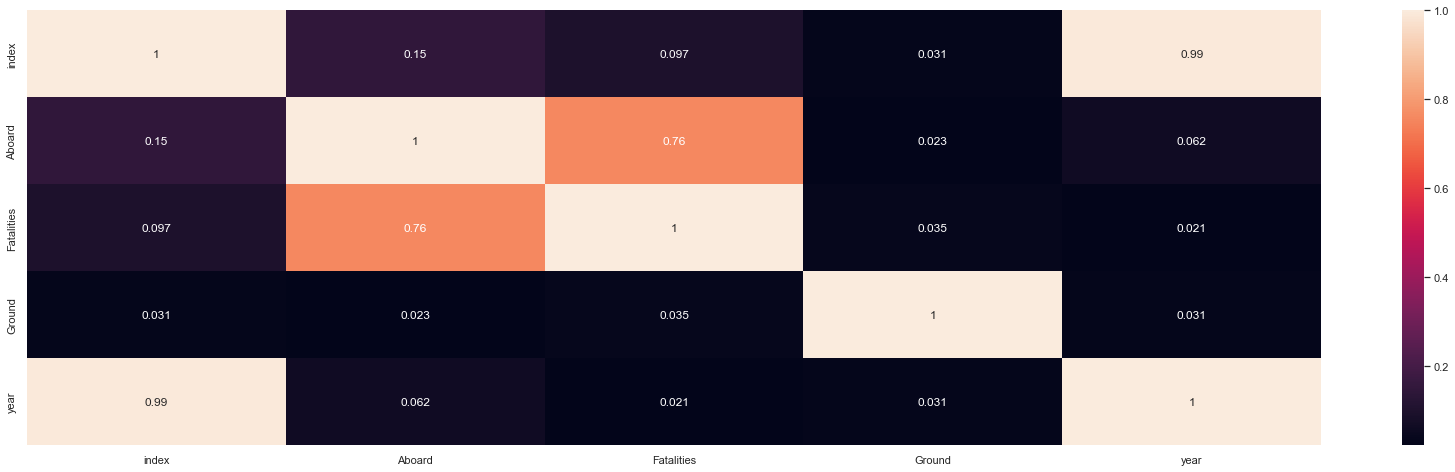

In [23]:
plt.subplots(figsize=(29,8))
corr = df1.corr()
sns.heatmap(corr,annot=True,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values);
plt.show()

In [24]:
# The skew () method calculates the skew for each column
# The skew () method searches column-wise and returns the skew of each row
df1.skew()

C:\Users\user\AppData\Local\Temp\ipykernel_15200\336109200.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.skew()


index         -0.004904
Aboard         4.241033
Fatalities     4.944346
Ground        50.243147
year          -0.392343
dtype: float64

In [25]:
# describe() is used to calculate some statistical data like percentile,mean,standard deviation,count.
df1.describe()

,index,Aboard,Fatalities,Ground,year
count,5241.000000,5221.000000,5231.000000,5221.000000,3046.000000
mean,2641.407747,27.620954,20.100554,1.602567,1977.347341
std,1517.596554,43.155006,33.257536,54.112538,20.548877
min,0.000000,0.000000,0.000000,0.000000,1908.000000
25%,1331.000000,5.000000,3.000000,0.000000,1963.000000
50%,2644.000000,13.000000,9.000000,0.000000,1978.000000
75%,3954.000000,30.000000,23.000000,0.000000,1995.000000
max,5267.000000,644.000000,583.000000,2750.000000,2009.000000


In [26]:
# Describe the Type column of df1
df1.Type.describe()

count             5241
unique            2446
top       Douglas DC-3
freq               334
Name: Type, dtype: object

### -1 indicates the missing values. Missing value does not always be present as null. How to handle it:
### Objective is:
### you should ignore the missing values in the calculations
### simply make it missing - replace -1 with NaN.
### all summary statistics- mean, median etc. we will ignore the missing values of pdays

In [27]:
# describe the Dirigible column with considering the -1 values
df1.loc[df1.index<0,"Type"] = np.NaN
df1.Type.describe()

count             5241
unique            2446
top       Douglas DC-3
freq               334
Name: Type, dtype: object

In [28]:
# describe the Dirigible variable in df1
df1.Type.describe()

count             5241
unique            2446
top       Douglas DC-3
freq               334
Name: Type, dtype: object

In [29]:
# check the no. of columns & rows
print('The Airplane Crash Dataset contains {:,d} rows & {} columns'.format(df.shape[0], df.shape[1]))

The Airplane Crash Dataset contains 5,268 rows & 17 columns


In [30]:
df.describe().style.background_gradient(cmap='icefire')

,index,Aboard,Fatalities,Ground,year
count,5268.000000,5246.000000,5256.000000,5246.000000,3047.000000
mean,2633.500000,27.554518,20.068303,1.608845,1977.356744
std,1520.884940,43.076711,33.199952,53.987827,20.552059
min,0.000000,0.000000,0.000000,0.000000,1908.000000
25%,1316.750000,5.000000,3.000000,0.000000,1963.000000
50%,2633.500000,13.000000,9.000000,0.000000,1978.000000
75%,3950.250000,30.000000,23.000000,0.000000,1995.000000
max,5267.000000,644.000000,583.000000,2750.000000,2009.000000


array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'Aboard'}>],
       [<AxesSubplot:title={'center':'Fatalities'}>,
        <AxesSubplot:title={'center':'Ground'}>],
       [<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

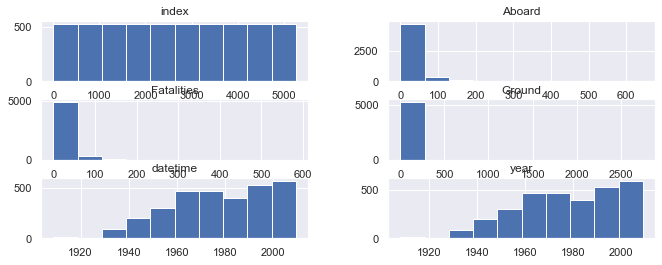

In [31]:
df.hist(bins=10)

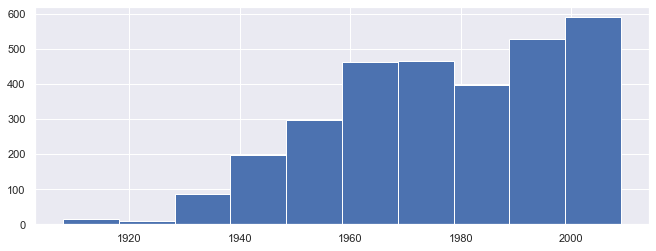

In [32]:
df['year'].value_counts()
df['year'].hist();

<AxesSubplot:>

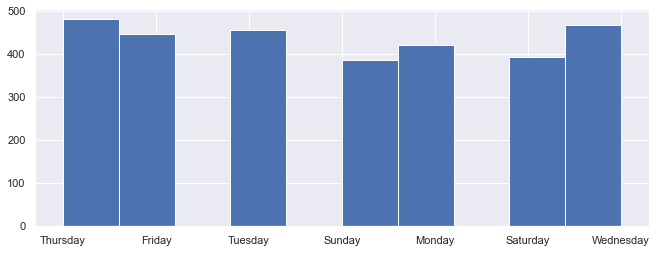

In [33]:
df['weekday'].value_counts()
df['weekday'].hist()

### it seems there is no division between work day or weekly holidays for this dataset. lets see the change over time

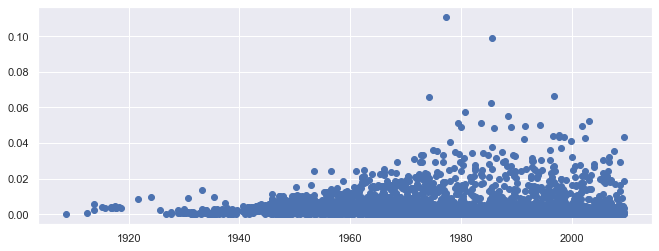

In [34]:
plt.scatter(x=df.datetime,y=df.Fatalities/df.Fatalities.count())

### to find serious fatalities, lets divide total number of fatalities by the number of fatalities for each incident.

In [35]:
# number of incidents over years
df2 = pd.merge(df,df.groupby(['year']).sum()['Fatalities'].reset_index(),on='year')

In [36]:
df2['Fatality_rate'] = df2['Fatalities_x']/df2['Fatalities_y']

<AxesSubplot:xlabel='year'>

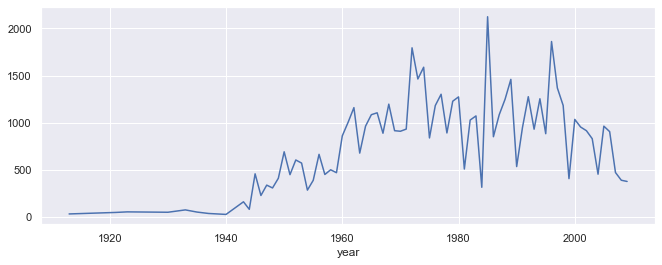

In [37]:
 # serious demaged crashes
df2[df2['Fatalities_x']>= df2['Fatalities_x'].mean()].groupby('year').sum()['Fatalities_x'].plot()

In [38]:
df['country'] = df['Location'].str.split(',').str[-1]
df

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,datetime,weekday,year,country
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908-09-17 17:18:00,Thursday,1908.0,Virginia
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912-07-12 06:30:00,Friday,1912.0,New Jersey
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,NaT,NaN,NaN,Canada
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913-09-09 18:30:00,Tuesday,1913.0,Over the North Sea
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913-10-17 10:30:00,Friday,1913.0,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",2009-05-20 06:30:00,Wednesday,2009.0,Indonesia
5264,5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...,NaT,NaN,NaN,DemocratiRepubliCongo
5265,5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,2009-06-01 00:15:00,Monday,2009.0,Brazil
5266,5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,2009-06-07 08:30:00,Sunday,2009.0,Canada


### Crashes by Location

<AxesSubplot:ylabel='country'>

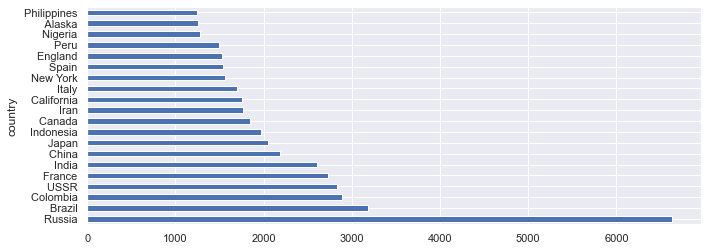

In [39]:
df.groupby('country').sum().sort_values(by='Fatalities',ascending=False)['Fatalities'][:20].plot(kind='barh')

<AxesSubplot:ylabel='Type'>

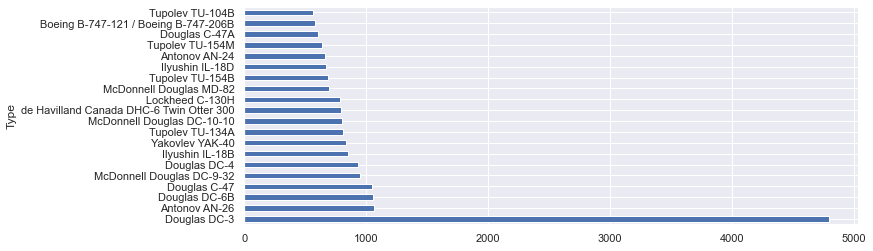

In [40]:
df.groupby('Type').sum().sort_values(by='Fatalities',ascending=False)['Fatalities'][:20].plot(kind='barh')

<AxesSubplot:ylabel='Route'>

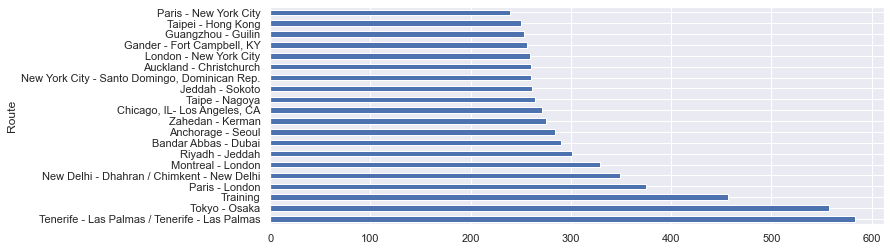

In [41]:
df.groupby('Route').sum().sort_values(by='Fatalities',ascending=False)['Fatalities'][:20].plot(kind='barh')

<AxesSubplot:ylabel='Operator'>

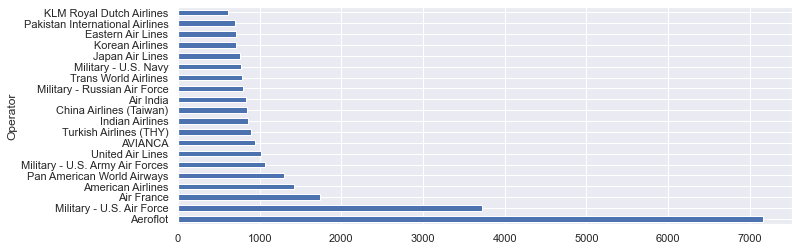

In [42]:
df.groupby('Operator').sum().sort_values(by='Fatalities',ascending=False)['Fatalities'][:20].plot(kind='barh')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


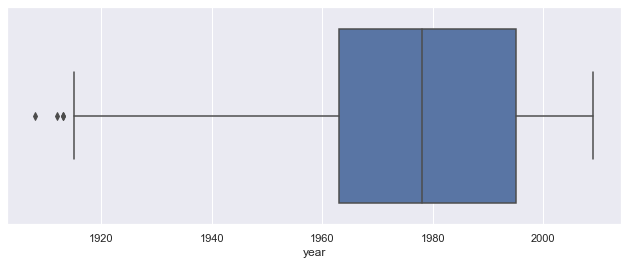

In [43]:
# Plot the boxplot of age variable
# To find summary of the set of data values
sns.boxplot(df2.year)
plt.show()

<AxesSubplot:xlabel='year'>

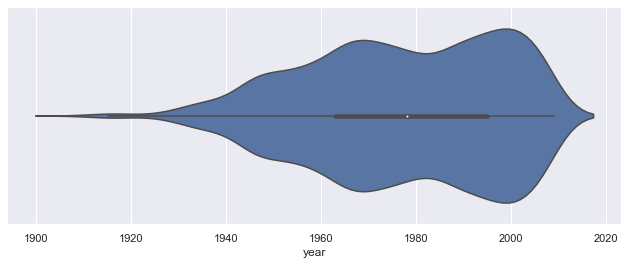

In [44]:
# VIOLINE PLOT - box and kernel
sns.violinplot(x=df["year"])

<AxesSubplot:xlabel='Aboard'>

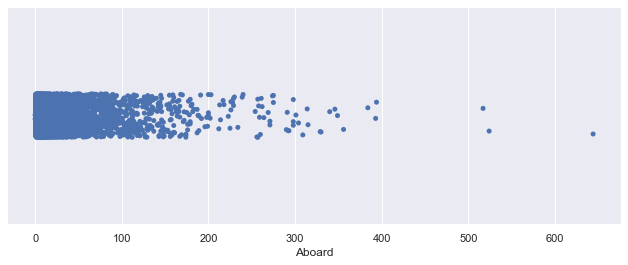

In [45]:
#STRIP PLOT
sns.stripplot(x=df["Aboard"])

<AxesSubplot:xlabel='year', ylabel='Aboard'>

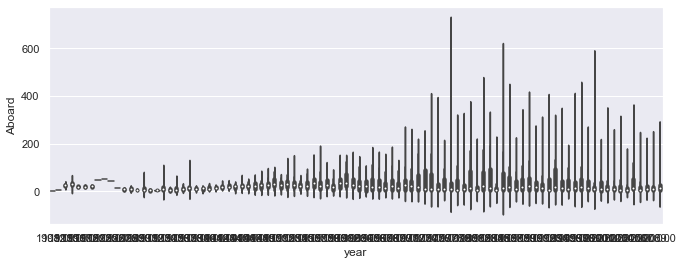

In [46]:
sns.violinplot(x=df["year"], y=df["Aboard"])